In [66]:
# PATH
import os
os.chdir('/Code/ditto_v2')
%pwd

'c:\\Code\\ditto_v2'

In [67]:
# %reset  # clean all variables

# 0.INPUTS (`d_inputs`)

In [68]:
# %reset  # clean all variables

In [69]:
### `d_inputs` INPUTS DICTIONARY ###
d_inputs = {
    'gadm' : 'D2',
    'l_country_data' : [
        # 'D1', 'D2','D3', 'D4', 'ZIP', 
        'census'
        ],
    'radius_km' : 20,
# ['Bayern','Baden-Württemberg','Hessen','Nordrhein-Westfalen','Rheinland-Pfalz', \
#             'Saarland','Sachsen','Sachsen-Anhalt','Thüringen','Berlin','Brandenburg','Mecklenburg-Vorpommern', \
#                 'Hamburg','Niedersachsen','Schleswig-Holstein','Bremen']
    # 'l_regions' : ['Bayern','Baden-Württemberg'],
    # 'l_regions' : ['Hessen', 'Baden-Württemberg'],
    'l_regions' : ['Baden-Württemberg'],
    # 'l_regions' : ['Bayern'],
    # 'l_regions' : ['Hessen'],

    'l_stores' : ['sportscheck'],
    # 'l_stores' : ['decathlon'],
    # 'l_stores' : ['decathlon', 'sportscheck'],
    # 'l_stores' : ['sportscheck', 'decathlon','intersport'],

    'stores' : { # d_region
        'sportscheck' : {
            'color' : 'orange'
        },
        'decathlon' : {
            'color' : (0.0, 130.0, 195.0, 255.0) # 'darkblue' # 
        },
        'intersport' : {
            'color' : 'darkred'
        }
    },
    'merged_region' : {
        'color' : 'yellow',
    },
    'maps_geom' : { # d_geom
        'maps_geom_is_roi' :        True,
        'maps_geom_is_towns' :      False,
        'maps_geom_is_stores' :     True,
        'maps_geom_is_circles' :    False,
    },
    'maps_region' : { # d_region
        'maps_region_is_stores' :               True,
        'maps_region_is_circles' :              True,
        'maps_region_is_join' :                 True,
        'maps_region_is_intersection' :         True,
        'maps_region_is_merge' :                True,  # Can NOT be computed if maps_region_is_merge False
        'maps_region_is_union_intersection':    True,  # Can NOT be computed if maps_region_is_merge False
        'maps_region_is_union_merge':           True,  # Can NOT be computed if maps_region_is_intersection False

        'maps_region_is_markers_inside':        True,
        'maps_region_is_markers_partly':        True,
        'maps_region_is_markers_outside':       True,
    },
    'is_logging' :              True,
    'round_dec' :               3,
    'is_simplified' :           False,
    'simplification_tolerance' : 0.1,       #(0.01 unit in projected CRS means 0.01 unit in reality),

    'path_census_D2' : './assets/Geo/Germany/D1_Deutschland_census.json'

}

### LISTS ###
l_stores= d_inputs['l_stores']
l_states = d_inputs['l_regions']
l_country_data = d_inputs['l_country_data']
### STRINGS ###
gadm = d_inputs['gadm']
path_census_D2 = d_inputs['path_census_D2']
### FLOATS ###
simplification_tolerance = float(d_inputs['simplification_tolerance'])
### INTS ###
round_dec = int(d_inputs['round_dec'])
radius_km = int(d_inputs['radius_km'])
### BOOLS ###
is_logging =    d_inputs['is_logging']
is_simplified = d_inputs['is_simplified']

### d_geom ('maps_geom')###
maps_geom_is_roi =      d_inputs['maps_geom']['maps_geom_is_roi']
maps_geom_is_towns =    d_inputs['maps_geom']['maps_geom_is_towns']
maps_geom_is_stores =   d_inputs['maps_geom']['maps_geom_is_stores']
maps_geom_is_circles =  d_inputs['maps_geom']['maps_geom_is_circles']

### d_region ('maps_region')###
maps_region_is_stores  =            d_inputs['maps_region']['maps_region_is_stores']
maps_region_is_circles =            d_inputs['maps_region']['maps_region_is_circles']
maps_region_is_join =               d_inputs['maps_region']['maps_region_is_join']
maps_region_is_intersection =       d_inputs['maps_region']['maps_region_is_intersection']
maps_region_is_merge =              d_inputs['maps_region']['maps_region_is_merge']
maps_region_is_union_intersection = d_inputs['maps_region']['maps_region_is_union_intersection']
maps_region_is_union_merge =        d_inputs['maps_region']['maps_region_is_union_merge']
maps_region_is_markers_inside     = d_inputs['maps_region']['maps_region_is_union_merge']
maps_region_is_markers_partly     = d_inputs['maps_region']['maps_region_is_markers_partly']
maps_region_is_markers_outside    = d_inputs['maps_region']['maps_region_is_markers_outside']
### d_roi ###
merged_region_color = d_inputs['merged_region']['color']

# 1.INGESTION (`gdf_census`, `gdf_stores`, `gdf_circles`)

In [70]:
### l_bundeslaender ###
from shapely import wkt
from src.functionality_maps import Defs

l_bundeslaender = [Defs.dict_bundeslaender_id[x] for x in l_states]
print(f'Region of Interest(RoI): {l_states}\n')

Region of Interest(RoI): ['Baden-Württemberg']



In [71]:
### gdf_census  ###
from src.functionality_maps import f_maps, Defs
import pandas as pd

pd.set_option('display.max_columns', None)
d_ger = f_maps.load_germany(l_levels=l_country_data, is_logging=is_logging)
gdf_census = d_ger['census']                                        #### FILTERING CENSUS #####
print(f'CENSUS/TOTAL: [{gdf_census.shape[0]}]')
gdf_census = gdf_census[gdf_census['SN_L'].isin(l_bundeslaender)]   #### FILTERING CENSUS TO RoI ####
print(f' CENSUS inside RoI: [{gdf_census.shape[0]}]')
gdf_census = f_maps.enrich_census(gdf_census)

Census is loaded!
 Normalizing non-serializable columns... ['BEGINN', 'WSK']
 Columns ['BEGINN', 'WSK'] removed
CENSUS/TOTAL: [10990]
 CENSUS inside RoI: [1103]


In [72]:
### gdf_census_merged ###
import geopandas as gpd
path_census_D2 = './assets/Geo/Germany/D1_Deutschland_census.json'
# gdf_census_merged = f_maps.merge_census_geom(d_ger['census'], is_logging=is_logging)
# gdf_census_merged.to_file(path_census_D2)
gdf_census_merged = gpd.read_file(path_census_D2)

## FILTER DATA BY l_statesbb

gdf_census_merged = gdf_census_merged[gdf_census_merged['Bundesland'].isin(l_states)]
gdf_census_merged

Bundesland       EWZ  area_dbms  area_geom  \
7  Baden-Württemberg  11280257      35219   35748.88   

                                            geometry  
7  MULTIPOLYGON (((7.71191 47.5388, 7.71067 47.53...

In [73]:
### gdf_stores ###
from src.functionality_maps import paths
import geopandas as gpd

### PDF_STORES ###
print('Loading stores...')
pdf_stores = pd.read_json(paths.stores, orient='records', lines=True)
pdf_stores['store_name'] = pdf_stores["store"] +"_" +  pdf_stores["name"]   ## ADD NAME OF STORE
print(f'STORES/TOTAL = {pdf_stores.shape[0]}')
pdf_stores = pdf_stores.dropna(subset=['lat','lon'])                        ### FILTER STORES WITH NO COORDS ###
print(f' STORES/Valid coords = {pdf_stores.shape[0]}')
pdf_stores = pdf_stores[pdf_stores['store'].isin(l_stores)]                 ### FILTER STORES WITH IN l_stores ###
print(f' STORES/Selected [{l_stores}]= {pdf_stores.shape[0]}')
pdf_stores['geometry'] = pdf_stores['point'].apply(wkt.loads)                  ### CONVERTING POINT COL TO GEOM ###
gdf_stores = gpd.GeoDataFrame(pdf_stores).set_geometry('geometry')
gdf_stores = gdf_stores.set_crs(4326)

#### gdf_circles ##### (VERY INEFFICIENT CODE)
## GENERATING CIRCLES AROUND STORES ##
gdf_circles_allstores = f_maps.get_gdf_circle(df=pdf_stores[['lon','lat','store','store_name','name', 'address']], radius_km= radius_km)
l_stores_all = gdf_circles_allstores['store_name'].drop_duplicates().to_list()
print(f' CIRCLES/Total = {len(l_stores_all)}')

#### gdf_circles #####
### JOIN CENSUS WITH CIRCLES ###
gdf_circles = gpd.sjoin(gdf_circles_allstores.to_crs(4326), gdf_census[['geometry']].to_crs(epsg=4326), 
                        how="inner", predicate="intersects")
gdf_circles = gdf_circles.drop(['index_right'], axis=1).drop_duplicates()
l_stores_roi = gdf_circles['store_name'].drop_duplicates().to_list()
print(f' CIRCLES/RoI = {len(l_stores_roi)}')

gdf_stores = gdf_stores[gdf_stores['store_name'].isin(l_stores_roi)]
print(f' STORES/RoI+SoI = {gdf_stores.shape[0]}')

Loading stores...
STORES/TOTAL = 508
 STORES/Valid coords = 500
 STORES/Selected [['sportscheck']]= 28
 CIRCLES/Total = 28
 CIRCLES/RoI = 3
 STORES/RoI+SoI = 3


In [74]:
## SIMPLIFY DATA GEOMETRIES (TO MAKE PROCESSIN GASTER)
# if is_simplified:
#     gdf_census['geometry'] = gdf_census.geometry.simplify(simplification_tolerance)
#     gdf_census_merged['geometry'] = gdf_census_merged.geometry.simplify(simplification_tolerance)

# gdf_census_simp.info()
# gdf_census_merged.info()

# 2.FUNCTIONS TO EXTRACT

In [ ]:
from geopy.distance import geodesic
import folium

def pairwise_min_dist(gdf1:gpd.GeoDataFrame, gdf2:gpd.GeoDataFrame) -> pd.DataFrame:
    gdf1['coords'] = gdf1.apply(lambda x: (x['lat'], x['lon']), axis=1)
    gdf2['coords'] = gdf2.apply(lambda x: (x['lat'], x['lon']), axis=1)

    coords_list1 = gdf1.coords.to_list()
    l_store_name = gdf1.store_name.to_list()
    coords_list2 = gdf2.coords.to_list()
    l_ARS_city = gdf2.ARS.to_list()
    l_city = gdf2.GEN.to_list()

    # Calculate pairwise distances
    d_dist = {}
    for i,(coord2,ARS,city) in enumerate(zip(coords_list2,l_ARS_city,l_city)):
        distances = []
        for j,(coord1,store_name) in enumerate(zip(coords_list1,l_store_name)):
            # print(f'j={j+1}, city={city}')
            distance = geodesic(coord1, coord2).km
            distances.append(distance)
            
        d_dist[ARS] = {
            'GEN' : city,
            'dist' : distances,
            'store' : l_store_name,
            'latlon_store': coords_list2,
            'latlon_gen' : coords_list1
        }
        
    pdf_dist = pd.DataFrame.from_dict(d_dist, orient='index')
    pdf_dist2 = pdf_dist.explode(['dist', 'store']).reset_index(names=['ARS'])

    indices = pdf_dist2.groupby(['ARS','GEN'])['dist'].idxmin()
    pdf_dist2.loc[indices,'dist_min_store'] = pdf_dist2.loc[indices, 'store']
    pdf_dist2= pdf_dist2[pdf_dist2['dist_min_store'].notna()]
    return pdf_dist2

def get_fg_markers_region(gdf:gpd.GeoDataFrame, position:str, color:str, round_dec:int,
                            l_tooltip:list=['GEN'], col_lat:str='lat', col_lon:str='lon',
                            is_shown:bool=False, is_logging:bool=False) -> folium.FeatureGroup:
    num_towns = gdf.shape[0]
    markers = f_maps.get_markers_polygon(gdf,
                                            l_tooltip=l_tooltip, 
                                            col_lat=col_lat, col_lon=col_lon, 
                                            name=f'Markers {position} [{num_towns}]', 
                                            color=color)
    pop_total = round(gdf.EWZ.sum()/10**6,round_dec)
    pop_inside = 0
    if position in ['inside', 'partly']:
        pop_inside = round(gdf.EWZ_int.sum()/10**6,round_dec)
    avg_geom_int = 0
    if position in ['inside', 'partly']:
        avg_geom_int = round(100*gdf.PERC_geom_int.mean(), round_dec)
    fg = folium.FeatureGroup(name=f'Markers - {position} [towns:{num_towns}, \
                                    Pop_inside:{pop_inside}M/Pop_partly:{pop_total}M/Avg perc={avg_geom_int}%]',
                                    show = is_shown)
    markers.add_to(fg)
    return fg

In [76]:
# from sklearn.metrics.pairwise import haversine_distances
# import numpy as np

# def compute_haversine(gdf1:gpd.GeoDataFrame, gdf2:gpd.GeoDataFrame) -> pd.DataFrame:
#     gdf1['geometry_radians'] = gdf1.apply(lambda x: (np.radians(x['lon']), np.radians(x['lat'])), axis=1)
#     gdf2['geometry_radians'] = gdf2.apply(lambda x: (np.radians(x['lon']), np.radians(x['lat'])), axis=1)

#     Earth_radius_km =  6378
#     dist = haversine_distances(gdf_cities.geometry_radians.to_list(), gdf1.geometry_radians.to_list()) * Earth_radius_km
#     pdf_dist = pd.DataFrame(dist, index = [gdf2.ARS], columns = gdf1.store_name)

#     # Get the minimum value for each row
#     min_values = pdf_dist.min(axis=1)

#     # Get the column name of the minimum value for each row
#     min_column_names = pdf_dist.idxmin(axis=1)

#     # Combine the results
#     result = pd.DataFrame({'min_dist_km': min_values, 'dist_min_store': min_column_names}).reset_index()
#     result['dist'] = round(result['min_dist_km'], round_dec)
#     return result

# gdf_result = compute_haversine(gdf1= gdf_stores, gdf2=gdf_cities)
# gdf_result

# 3.PROCESSING

In [77]:
print(f'l_regions:{l_states}')
print(f'l_stores:{l_stores}')
print(f'radius_km:{radius_km}')
print(f'gdf_circles {gdf_circles.shape[0]}')
print(f'gdf_stores  {gdf_stores.shape[0]}')
print(f'gdf_census  {gdf_census.shape[0]}')

l_regions:['Baden-Württemberg']
l_stores:['sportscheck']
radius_km:20
gdf_circles 3
gdf_stores  3
gdf_census  1103


## 3.1. `d_geom` [RoI, Towns, Stores, Circles]

In [78]:
### (fg_geom_region) ALL RoI ###
### (fg_geom_town)   ALL TOWNS RELEVANT TO RoI ###
### (fg_mk_storeall) ALL STORES RELEVANT TO RoI ###
### (fg_circ_store)  ALL CIRCLES RELEVANT TO RoI ###

import folium
from src.functionality_maps import f_maps, f_gadm


l_fg_geometry = []
if maps_geom_is_roi:
    fg_geom_pop = round(gdf_census_merged.EWZ.sum() / 10**6, round_dec)
    fg_geom_area = gdf_census_merged.area_geom.sum()
    fg_legend = f'Region(s) of Interest [#={len(l_states)}, Pop:{fg_geom_pop}M, Area:{fg_geom_area}Km2]'
    print(f'Shape={gdf_census_merged.shape[0]}')

    fg_geom_region = folium.FeatureGroup(name=fg_legend)
    gjson_store = f_maps.get_folium_geojson( gdf_census_merged, 
                                    fields=['Bundesland', 'EWZ', 'area_geom'],
                                    aliases = ['Bundesland', 'Pop', 'Area_geom[Km2]']
                                    )
    gjson_store.add_to(fg_geom_region)
    l_fg_geometry += [fg_geom_region] 

if maps_geom_is_towns:
    num_towns = gdf_census.shape[0]
    fg_geom_pop = round(gdf_census.EWZ.sum() / 10**6, round_dec)
    fg_geom_area = gdf_census.to_crs(6933).area_geom.sum()

    legend_geom_town = f'Towns in RoI [#={num_towns}]'


    fg_geom_town = folium.FeatureGroup(name=legend_geom_town, show=False)
    gjson_store = f_maps.get_folium_geojson(gdf_census.to_crs(4326), 
                                    fields=['GEN', 'EWZ', 'area_geom', 'KFL'],
                                    aliases = ['Town', 'Pop', 'Area_geom[km2]', 'Area_dbms[Km2]'],
                                    )
    gjson_store.add_to(fg_geom_town)
    l_fg_geometry += [fg_geom_town]

if maps_geom_is_stores:
    print(f'# Stores chain selected:{gdf_stores.shape[0]}')
    fg_mk_storeall = f_gadm.get_fg_store(gdf_stores, l_stores)
    l_fg_geometry += fg_mk_storeall

if maps_geom_is_circles:
    print(f'Shape Circles RoI:{gdf_stores.shape[0]}')
    gdf_circles_stores_all = f_maps.get_gdf_circle(df=gdf_stores, radius_km= radius_km).drop(['point'], axis=1)
    fg_circ_store = f_maps.get_fg_gjson(gdf=gdf_circles_stores_all, fg_name=f'Circles [r={radius_km}Km]',
                                        fields=['store','name', 'address'],
                                        aliases = ['store', 'name', 'address'])
    l_fg_geometry +=  [fg_circ_store]


### ADDING FG into GroupedLayerControl
fglc_geom = folium.plugins.GroupedLayerControl(
    groups={'Geometry': l_fg_geometry},
    exclusive_groups=False,
    collapsed=False,
)
d_geom = {
    'l_fg' : l_fg_geometry,
    'fglc' : fglc_geom
}

Shape=1


# Stores chain selected:3


## 3.2. `d_region` [Join,Intersection,Merge,Union(int),Union(merge)]

In [79]:
### VARIABLES FOR LOOP BELOW ###
col_perc_dbms = 'PERC_dbms_int'
col_perc_geom = 'PERC_geom_int'
col_perc_pop = 'PERC_pop'
l_cols_percentaged = ['area_geom', 'EWZ', 'KFL']

d_columns = {
    'area_geom':{'alias': 'area',         'is_norm': True,  'is_int':False},
    'KFL':     {'alias' : 'area_data',    'is_norm': True,  'is_int':False},
    'EWZ':     {'alias' : 'Population',   'is_norm': True,  'is_int':True}
}
# print(f'[{len(l_bundeslaender)}] # Towns: {gdf_census.shape[0]}/ #Stores={gdf_stores.shape[0]} / #Circles={gdf_circles.shape[0]}')
# gdf_circles_region.store_name.to_list()

In [80]:
### [d_region] --> LOOP PROCESSING [Region[Store]] ###
from src.functionality_maps import f_maps, f_gadm

d_region = {}
for j,region_name in enumerate(l_states):
    d_fglc = {}

    region_no = Defs.dict_bundeslaender_id[region_name]
    ### FILTER BY REGION ###
    gdf_census_region = gdf_census[gdf_census['SN_L'] == region_no]
    gdf_circles_region = gpd.sjoin(gdf_circles, gdf_census_region[['geometry']].to_crs(4326), how="inner", predicate="intersects")
    gdf_circles_region = gdf_circles_region.drop(['index_right'], axis=1).drop_duplicates()
    gdf_stores_region = gdf_stores[gdf_stores['store_name'].isin(gdf_circles_region.store_name.to_list())]
    print(f'[{j+1}/{len(l_bundeslaender)}] Region={region_no}/{region_name}/ ' +
          f'# Towns: {gdf_census_region.shape[0]}/ #Stores={gdf_stores_region.shape[0]} / #Circles={gdf_circles_region.shape[0]}')
    
    for i,store_sel in enumerate(l_stores):
        l_fg_store = []
        ### FILTER BY STORE ###
        gdf_stores_region_stores = gdf_stores_region[gdf_stores_region['store'] == store_sel]
        gdf_circles_region_stores = gdf_circles_region[gdf_circles_region['store'] == store_sel]
        gdf_circles_region_stores = gdf_circles_region_stores#.drop(['point'],axis=1)
        print(f'  [{i+1}/{len(l_stores)}] Store={store_sel} / # Stores = {gdf_stores_region_stores.shape[0]}/ ' \
              f'# Circles = {gdf_circles_region_stores.shape[0]}')

        if gdf_circles_region_stores.shape[0] == 0:
            continue

        ### Stores ###
        if maps_region_is_stores:
            fg_mk_store = f_gadm.get_fg_store(gdf_stores_region_stores, [store_sel])
            fg_mk_store = fg_mk_store[0]
            l_fg_store.append(fg_mk_store)
            # fg_mk_store = get_fg_store2(gdf_stores_region_stores, [store_sel], 'variation')
            # print(f'len(fg_mk_store)={len(fg_mk_store)}')
            # fg_mk_store = fg_mk_store[0]
            # l_fg_store.append(fg_mk_store)
            if is_logging:
                print(f' # Stores ={gdf_stores_region_stores.shape[0]}')

        ### Circles ###
        if maps_region_is_circles:
            fg_circ_store = f_maps.get_fg_gjson(gdf=gdf_circles_region_stores, fg_name=f'Circles [r={radius_km}Km]',
                                        fields=['store','name', 'address'],
                                        aliases = ['store', 'name', 'address'],
                                        fill_color = d_inputs['stores'][store_sel]['color'])
            l_fg_store.append(fg_circ_store)
            if is_logging:
                print(f' # Circles ={gdf_circles_region_stores.shape[0]}')

        ### Join ###
        if maps_region_is_join:
            gdf_circles_all_store = gdf_circles[gdf_circles['store'] == store_sel]
            gdf_joi_circ_geom_store = gpd.sjoin(gdf_census_region.to_crs(epsg=4326), gdf_circles_region_stores.to_crs(4326), how="inner", predicate="intersects")
            gdf_joi_circ_geom_store['area'] = round(gdf_census_region.geometry.area / 10**6, round_dec)
            fg_joi_circ_geom_store = f_maps.get_fg_gjson(gdf=gdf_joi_circ_geom_store, fg_name=f'Join',
                                                    fields=['GEN', 'EWZ', 'KFL', 'area'],
                                                    aliases = ['Name', 'Population', 'Area_dbms', 'Area_Geom'])
            l_fg_store.append(fg_joi_circ_geom_store)
            if is_logging:
                print(f' # Joins ={gdf_joi_circ_geom_store.shape[0]}')

        ### INTERSECTION ###
        gdf_int_circ_geom = gpd.overlay(gdf_census_region, 
                                        gdf_circles_region_stores[['geometry','store','store_name']].to_crs(6933), 
                                        how='intersection')
        gdf_int_circ_geom['area'] = round(gdf_int_circ_geom.geometry.area / 10**6, round_dec)
        gdf_int_circ_geom[col_perc_geom] = round(gdf_int_circ_geom['area'] / gdf_int_circ_geom['area_geom'], 3)
        
        gdf_overlay = f_maps.overlay_shapes(gdf_circle=gdf_int_circ_geom,
                                            col_perc=col_perc_geom, 
                                            d_columns=d_columns)
        gdf_overlay[col_perc_dbms] = round(gdf_overlay['KFL_int'] / gdf_overlay['KFL'], 3)
        gdf_overlay[col_perc_pop] = round(gdf_overlay['EWZ_int'] / gdf_overlay['EWZ'], 3)

        fg_int_circ_geom_store = f_maps.get_fg_gjson(gdf=gdf_overlay, fg_name=f'Intersection',
                                    fields=['GEN', 'store_name', 
                                            'area_geom_int', 'area_geom', col_perc_geom,
                                            'EWZ_int', 'EWZ', col_perc_pop],
                                    aliases = ['City', 'Store name', 
                                            'Area inside[Km2]', 'Area shape[Km2]', 'Area perc[%]',
                                            'Pop inside', 'Pop total', 'Pop perc[%]'])
        if maps_region_is_intersection:
            l_fg_store.append(fg_int_circ_geom_store)
            if is_logging:
                print(f' # Intersections ={gdf_overlay.shape[0]}')
        
        ### Merge ###
        gdf_mer_circ_geom = gdf_int_circ_geom.groupby(['store','store_name']).agg( \
            {'geometry': lambda x: x.geometry.union_all(),
            'EWZ_int':'sum', 
            'EWZ':'sum', 
            'KFL_int' : 'sum',
            'KFL' : 'sum',
            'area_geom_int' : 'sum',
            'area_geom' : 'sum'
            }).set_geometry("geometry").set_crs(6933).reset_index()

        # Set the column used for NORMALIZATION (numerator)
        gdf_mer_circ_geom[col_perc_geom] = round(gdf_mer_circ_geom['area_geom_int'] / gdf_mer_circ_geom['area_geom'], 3)
        gdf_mer_circ_geom[col_perc_dbms] = round(gdf_mer_circ_geom['KFL_int'] / gdf_mer_circ_geom['KFL'], 3)
        gdf_mer_circ_geom[col_perc_pop]  = round(gdf_mer_circ_geom['EWZ_int'] / gdf_mer_circ_geom['EWZ'], 3)
        
        fg_mer_circ_geom_store = f_maps.get_fg_gjson(gdf=gdf_mer_circ_geom, fg_name=f'Merge',
                                    fields=['store', 'store_name', 
                                            'area_geom_int', 'area_geom', col_perc_geom,
                                            'EWZ_int', 'EWZ', col_perc_pop],
                                    aliases = ['Store_chain', 'Store name', 
                                                'Area inside[Km2]', 'Area shape[Km2]', 'Area perc[%]',
                                                'Pop inside', 'Pop total', 'Pop perc[%]'],
                                    is_styled = True,
                                    fill_color = d_inputs['stores'][store_sel]['color'])
        if maps_region_is_merge:
            l_fg_store.append(fg_mer_circ_geom_store)
        if is_logging:
                print(f' # Merges ={gdf_mer_circ_geom.shape[0]}')

        ### Union (Intersection) ###
        poly_merged = gdf_mer_circ_geom.geometry.union_all()
        gdf_poly_merged = gpd.GeoSeries([poly_merged]).to_frame(name='geometry').set_crs(epsg=6933)
        
        gdf_merge2 = gpd.overlay(gdf_census_region, gdf_poly_merged, how='intersection')
        gdf_merge2['area'] = round(gdf_merge2.geometry.area / 10**6, round_dec)
        gdf_merge2[col_perc_geom] = round(gdf_merge2['area'] / gdf_merge2['area_geom'], 3)

        gdf_overlay2 = f_maps.overlay_shapes(gdf_circle=gdf_merge2, col_perc=col_perc_geom, d_columns=d_columns)
        gdf_overlay2['num_stores'] = gdf_mer_circ_geom.shape[0]
        gdf_overlay2['store_chain'] = store_sel
        gdf_overlay2['area'] = round(gdf_overlay2.geometry.area / 10**6, round_dec)

        fg_uni_circ_geom_store = f_maps.get_fg_gjson(gdf=gdf_overlay2.to_crs(4326), fg_name=f'Union (Intersection)',
                                    fields=   ['GEN', 'store_chain', 'area', 'EWZ_int'],
                                    aliases = ['City','Store chain', 'Area GEN[Km2]', 'Pop'],
                                    is_styled = True,
                                    fill_color = d_inputs['stores'][store_sel]['color'])
        if maps_region_is_union_intersection:
            l_fg_store.append(fg_uni_circ_geom_store)
        if is_logging:
            print(f' # Union (intersection) ={gdf_overlay2.shape[0]}')

        ### Union (Merge) ###
        gdf_store_circles_merged_union = gdf_overlay2.groupby(['store_chain','num_stores']).agg( \
            {'geometry': lambda x: x.geometry.union_all(),
            'EWZ_int':'sum', 
            'area' : 'sum',
            }).set_geometry("geometry").set_crs(6933).reset_index()
        
        gdf_store_circles_merged_union['area_total'] = round(gdf_census_region.geometry.area.sum() / 10**6, 3)
        gdf_store_circles_merged_union[col_perc_geom] = round(100*gdf_store_circles_merged_union['area'] / gdf_store_circles_merged_union['area_total'], round_dec)

        gdf_store_circles_merged_union['EWZ_int_milions'] = round(gdf_store_circles_merged_union['EWZ_int'] / 10**6, round_dec)
        gdf_store_circles_merged_union['EWZ_total_milions'] = round(gdf_census_region.EWZ.sum()/10**6, 3)
        gdf_store_circles_merged_union[col_perc_pop] = round(100*gdf_store_circles_merged_union['EWZ_int_milions'] / gdf_store_circles_merged_union['EWZ_total_milions'], round_dec)

        fg_mer_uni_circ_geom_store = f_maps.get_fg_gjson(gdf=gdf_store_circles_merged_union.to_crs(4326), fg_name=f'Union (Merge)',
                                        fields=['store_chain', 'num_stores',
                                                'area', 'area_total', col_perc_geom, 
                                                'EWZ_int_milions', 'EWZ_total_milions', col_perc_pop],
                                        aliases = ['Store chain','# Stores',
                                                'Area stores[Km2]', 'Area RoI[Km2]', 'Area perc[%]', 
                                                'Pop[M]', 'Pop RoI[M]','Pop perc[%]'],
                                        is_styled = True,
                                        fill_color = d_inputs['stores'][store_sel]['color'])

        if maps_region_is_union_merge:
            l_fg_store.append(fg_mer_uni_circ_geom_store)
        if is_logging:
            print(f' # Union (Merge) ={gdf_store_circles_merged_union.EWZ_int.sum()}')


        col_interest = ['ARS','lat','lon',col_perc_geom,'GEN', 'area_geom_int', 'area_geom', 'EWZ_int', 'EWZ']
        gdf_cities = gdf_overlay2[col_interest]
        pdf_dist = pairwise_min_dist(gdf1=gdf_stores_region, gdf2=gdf_cities)
        gdf_dist = pdf_dist[['ARS','dist','dist_min_store']].merge(gdf_overlay2, on='ARS', how='right')

        ###  INSIDE  ###
        if maps_region_is_markers_inside:
            gdf_inside = gdf_dist[gdf_dist[col_perc_geom] >= 1.0]
            fg_markers_inside = get_fg_markers_region(gdf=gdf_inside, position = 'inside', color='darkgreen',
                                                       round_dec=round_dec, is_shown = False, is_logging=is_logging)
            l_fg_store.append(fg_markers_inside)
            if is_logging:
                print(f' # Markers Inside [Towns={gdf_inside.shape[0]}/ Pop={gdf_inside.EWZ_int.sum()}]')
  
        ###  PARTLY  ###
        if maps_region_is_markers_partly:
            gdf_partly = gdf_dist[gdf_dist[col_perc_geom] < 1.0]
            fg_markers_partly = get_fg_markers_region(gdf=gdf_partly, position = 'partly', color='orange', 
                                                      round_dec=round_dec, is_shown = False, is_logging=is_logging)
            l_fg_store.append(fg_markers_partly)
            if is_logging:
                print(f' # Markers Partly [Towns={gdf_partly.shape[0]}/ Pop={gdf_partly.EWZ_int.sum()}]')
 
        ###  OUTSIDE  ###
        if maps_region_is_markers_outside:
            gdf_outside = gdf_census_region[~gdf_census_region['ARS'].isin(gdf_dist['ARS'])]
            fg_markers_outside = get_fg_markers_region(gdf=gdf_outside, position = 'outside', color='red', 
                                                       round_dec=round_dec, is_shown = False, is_logging=is_logging)
            l_fg_store.append(fg_markers_outside)
            if is_logging:
                print(f' # Markers Outside [Towns={gdf_outside.shape[0]}/ Pop={gdf_outside.EWZ.sum()}]')
 
        ### GENERATING GroupedLayerControl FOR STORE ###
        fglc_store = folium.plugins.GroupedLayerControl(
            groups={f'{region_no}/{region_name}-{store_sel}': l_fg_store},
            exclusive_groups=False,
            collapsed=False)

        ### SAVING IT IN THE DICTIONARY ###
        d_fglc[store_sel] = {
            'store_name' : store_sel,
            'l_children' : l_fg_store,
            'fglc' :       fglc_store,
        }
        if maps_region_is_union_intersection:
            # d_fglc[store_sel]['df_5_merge'] = gdf_mer_circ_geom
            d_fglc[store_sel]['df_6_union'] = gdf_overlay2
    
    d_region[region_no] = {
        'region_no' : region_no,
        'region_name' : region_name,
        'store' : d_fglc
    }

[1/1] Region=08/Baden-Württemberg/ # Towns: 1103/ #Stores=3 / #Circles=3
  [1/1] Store=sportscheck / # Stores = 3/ # Circles = 3
 # Stores =3
 # Circles =3
 # Joins =147
 # Intersections =147
 # Merges =3
 # Union (intersection) =147
 # Union (Merge) =2667008


C:\Users\User\AppData\Local\Temp\ipykernel_5196\91181825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf2['coords'] = gdf2.apply(lambda x: (x['lat'], x['lon']), axis=1)


 # Markers Inside [Towns=64/ Pop=2085817]
 # Markers Partly [Towns=83/ Pop=581191]
 # Markers Outside [Towns=956/ Pop=7873942]


## 3.3. `d_roi` [gdf_union_int,gdf_union_,merge]

In [81]:
def gen_gdf_all_stores(df:gpd.GeoDataFrame, gdf_census:gpd.GeoDataFrame, 
                       l_groupby:list=['BL','store'], round_dec:int=3) -> [gpd.GeoDataFrame, gpd.GeoDataFrame]:
    poly_merged_allstores = df.geometry.union_all()
    gdf_merged_allstores = gpd.GeoSeries([poly_merged_allstores]).to_frame(name='geometry').set_crs(epsg=6933)

    gdf_merged_allstores = df.groupby(l_groupby).agg( \
            {'geometry': lambda x: x.geometry.union_all(),
            'num_stores':'sum', 
            }).set_geometry("geometry").set_crs(6933).reset_index()

    gdf_census_region = gdf_census.to_crs(6933)
    gdf_union_int_allstores = gpd.overlay(gdf_census_region, gdf_merged_allstores.to_crs(6933), how='intersection')

    Pop_sum = round(gdf_union_int_allstores.EWZ.sum()  / 10**6, round_dec)
    gdf_merged_allstores['EWZ'] = Pop_sum
    gdf_merged_allstores['area'] = round(gdf_merged_allstores.geometry.area.sum()/10**6, round_dec)
    gdf_merged_allstores['perc_area'] = round(100*gdf_merged_allstores['area'] / fg_geom_area, round_dec)
    gdf_merged_allstores['perc_pop'] = round((100*Pop_sum/10**6) / fg_geom_pop, round_dec)

    return [gdf_union_int_allstores, gdf_merged_allstores]

In [82]:
### MERGING STORES IN THE SAME REGION ###
d_roi = {}
l_fg_merged_allstores = []

for j,(region_no,region_values) in enumerate(d_region.items()):
    print(f'[{j+1}/{len(d_region)}] Region={region_values['region_no']}/{region_values['region_name']}')
    dict_fglc = region_values['store']
    if not(dict_fglc):
        print(f' Region={region_values['region_name']} has no stores')
        continue

    gdf_concat_allstores = pd.DataFrame()
    for i,(k,v) in enumerate(dict_fglc.items()):
        if 'df_6_union' not in list(v.keys()):
            # print(f'Region={region_values['region_name']} has no union of stores for store [{k}]')
            continue
        
        print(f'  [{i+1}/{len(dict_fglc)}] Store:{v['store_name']}')
        gdf_concat_allstores = pd.concat([gdf_concat_allstores, v['df_6_union']], ignore_index=True)
    
    if gdf_concat_allstores.empty:
        print(f' Region=[{region_values['region_name']}] has NO stores')
        continue

    gdf_concat_allstores['BL'] = region_values['region_no']
    gdf_concat_allstores['State'] = region_values['region_name']
    # df['BL'] = 'RoI'

    [gdf_union_int_allstores, gdf_union_merge_allstores] = \
        gen_gdf_all_stores(df=gdf_concat_allstores, gdf_census=gdf_census,l_groupby=['BL','State'])
    fg_merged_allstores_region = folium.FeatureGroup(name=f'Region [{region_values['region_no']}/{region_values['region_name']}] \
                                                     Stores[{gdf_union_merge_allstores['num_stores'].values[0]}]',
                                                     show=False)
    gjson_store = f_maps.get_folium_geojson(gdf_union_merge_allstores.to_crs(4326),
                                    fields=['num_stores','area', 'perc_area', 'EWZ', 'perc_pop'],
                                    aliases = ['# Stores','Area [Km2]', 'Area perc[%]', 'Pop[M]', 'Pop perc[%]'],
                                    is_styled = True,
                                    fill_color = merged_region_color
                                    ).add_to(fg_merged_allstores_region)

    # l_fg_merged_allstores.append(gdf_union_int_allstores)
    l_fg_merged_allstores.append(fg_merged_allstores_region)
    d_roi[region_no] ={
        'gdf_concat'      : gdf_concat_allstores,
        'gdf_union_int'   : gdf_union_int_allstores,
        'gdf_union_merge' : gdf_union_merge_allstores,
    }

if not gdf_concat_allstores.empty:
    ### GENERATING GroupedLayerControl FOR REGION ###
    fglc_all_stores = folium.plugins.GroupedLayerControl(
        groups={f'Regions [{len(d_region.items())}]': l_fg_merged_allstores},
        exclusive_groups=False,
        collapsed=False,
    )
    d_roi['l_fg'] = l_fg_merged_allstores
    d_roi['fglc'] = fglc_all_stores

[1/1] Region=08/Baden-Württemberg
  [1/1] Store:sportscheck


# 4.MARKERS

In [83]:
from shapely import geometry

# #### EXTRACTING LOCATIONS FROM STORES ####
l_center_points = list(zip(gdf_stores['lat'], gdf_stores['lon'], gdf_stores['store_name']))

print(f'# Towns: {gdf_overlay2.shape[0]}')
print(f'# Stores: {gdf_stores_region.shape[0]}')

# Towns: 147
# Stores: 3


In [84]:



# pdf_dist = pairwise_min_dist(gdf1=gdf_stores_region, gdf2=gdf_cities)
# gdf_dist = pdf_dist[['ARS','dist','dist_min_store']].merge(gdf_overlay2, on='ARS', how='right')
# gdf_dist

In [85]:
# gdf_stores_region['coords'] = gdf_stores_region.apply(lambda x: (x['lat'], x['lon']), axis=1)
# gdf_cities['coords'] = gdf_cities.apply(lambda x: (x['lat'], x['lon']), axis=1)

# coords_list1 = gdf_stores_region.coords.to_list()
# l_store_name = gdf_stores_region.store_name.to_list()
# coords_list2 = gdf_cities.coords.to_list()
# l_ARS_city = gdf_cities.ARS.to_list()
# l_city = gdf_cities.GEN.to_list()
# # distances = [geodesic(coord1, coord2).km for coord1, coord2 in zip(l_coord1, l_coord2)]

# # Calculate pairwise distances
# d_dist = {}
# # l_ars = 
# for i,(coord2,ARS,city) in enumerate(zip(coords_list2,l_ARS_city,l_city)):
#     distances = []
#     for j,(coord1,store_name) in enumerate(zip(coords_list1,l_store_name)):
#         # print(f'j={j+1}, city={city}')
#         distance = geodesic(coord1, coord2).km
#         distances.append(distance)
        
#     d_dist[ARS] = {
#         'GEN' : city,
#         'dist' : distances,
#         'store' : l_store_name,
#         'latlon_store': coords_list2,
#         'latlon_gen' : coords_list1
#     }
    

# d_dist

In [86]:
# pdf_dist = pd.DataFrame.from_dict(d_dist, orient='index')
# pdf_dist2 = pdf_dist.explode(['dist', 'store']).reset_index(names=['ARS'])

# indices = pdf_dist2.groupby(['ARS','GEN'])['dist'].idxmin()#.reset_index(drop=True)
# indices
# # l_idx_mindist = list(indices.values)
# pdf_dist2.loc[indices,'dist_min_store'] = pdf_dist2.loc[indices, 'store']
# pdf_dist2= pdf_dist2[pdf_dist2['dist_min_store'].notna()]
# pdf_dist2.shape

# gdf_dist = pdf_dist2[['ARS','dist','dist_min_store']].merge(gdf_overlay2, on='ARS', how='right')
# gdf_dist.head(1)

In [87]:
# def get_fg_markers_region(gdf:gpd.GeoDataFrame, position:str, color:str,
#                             l_tooltip:list=['GEN'], col_lat:str='lat', col_lon:str='lon',
#                             is_logging:bool=False) -> folium.FeatureGroup:
#     num_towns = gdf.shape[0]
#     markers = f_maps.get_markers_polygon(gdf,
#                                             l_tooltip=l_tooltip, 
#                                             col_lat=col_lat, col_lon=col_lon, 
#                                             name=f'Markers {position} [{num_towns}]', 
#                                             color=color)
#     pop_inside = round(gdf.EWZ_int.sum()/10**6,round_dec)
#     pop_total = round(gdf.EWZ.sum()/10**6,round_dec)
#     avg_geom_int = gdf.PERC_geom_int.mean()
#     fg = folium.FeatureGroup(name=f'Markers - {position} [towns:{num_towns}, \
#                                     pop_inside:{pop_inside}/Pop_partly:{pop_total}/Avg perc={avg_geom_int}]')
#     markers.add_to(fg)
#     return fg

# ###  INSIDE  ###
# if maps_region_is_markers_inside:
#     gdf_inside = gdf_dist[gdf_dist[col_perc_geom] >= 1.0]
#     fg_markers_inside = get_fg_markers_region(gdf=gdf_inside, position = 'inside', color='darkgreen', is_logging=is_logging)

# ###  PARTLY  ###
# if maps_region_is_markers_partly:
#     gdf_partly = gdf_dist[gdf_dist[col_perc_geom] < 1.0]
#     fg_markers_partly = get_fg_markers_region(gdf=gdf_partly, position = 'partly', color='orange', is_logging=is_logging)

# ###  OUTSIDE  ###
# if maps_region_is_markers_outside:
#     gdf_outside = gdf_census_region[~gdf_census_region['ARS'].isin(gdf_dist['ARS'])]

In [88]:
# ### fg_inside, fg_partly, fg_outside ###

# ###  INSIDE  ###
# if maps_region_is_markers_inside:
#     gdf_inside = gdf_dist[gdf_dist[col_perc_geom] >= 1.0]
#     num_inside_towns = gdf_inside.shape[0]

#     fg_inside_circle = f_maps.get_markers_polygon(gdf_inside,
#                                             l_tooltip=['GEN','dist', 'dist_min_store'],
#                                             col_lat='lat', col_lon='lon', 
#                                             name=f'Markers inside {num_inside_towns}', color='darkgreen')
#     pop_inside = round(gdf_inside.EWZ_int.sum()/10**6,round_dec)
#     pop_partly = round(gdf_inside.EWZ.sum()/10**6,round_dec)
#     avg_geom_int = gdf_inside.PERC_geom_int.mean()
#     fg_inside = folium.FeatureGroup(name=f'Markers - Inside [towns:{num_inside_towns}, \
#                                     pop_inside:{pop_inside}/Pop_partly:{pop_partly}/Avg perc={avg_geom_int}]')
#     fg_inside_circle.add_to(fg_inside)


# ###  PARTLY  ###
# if maps_region_is_markers_partly:
#     gdf_partly = gdf_dist[gdf_dist[col_perc_geom] < 1.0]
#     num_partly_towns = gdf_partly.shape[0]

#     fg_partly_circle = f_maps.get_markers_polygon(gdf_partly,
#                                             l_tooltip=['GEN','dist', 'dist_min_store'], 
#                                             col_lat='lat', col_lon='lon', 
#                                             name=f'Markers partly {num_partly_towns}', color='orange')
#     pop_inside = round(gdf_partly.EWZ_int.sum()/10**6,round_dec)
#     pop_partly = round(gdf_partly.EWZ.sum()/10**6,round_dec)
#     avg_geom_int = gdf_partly.PERC_geom_int.mean()
#     fg_partly = folium.FeatureGroup(name=f'Markers - partly [towns:{num_partly_towns}, \
#                                     pop_inside:{pop_inside}/Pop_partly:{pop_partly}/Avg perc={avg_geom_int}]')
#     fg_partly_circle.add_to(fg_partly)


# # ###  OUTSIDE  ###
# if maps_region_is_markers_outside:
#     gdf_outside = gdf_census_region[~gdf_census_region['ARS'].isin(gdf_dist['ARS'])]
#     num_outside_towns = gdf_outside.shape[0]

#     fg_outside_circle = f_maps.get_markers_polygon(gdf_outside,
#                                             l_tooltip=['GEN'], 
#                                             col_lat='lat', col_lon='lon', 
#                                             name=f'Markers outside {num_outside_towns}', 
#                                             color='red')
#     pop_inside = round(gdf_outside.EWZ_int.sum()/10**6,round_dec)
#     pop_total = round(gdf_outside.EWZ.sum()/10**6,round_dec)
#     avg_geom_int = gdf_outside.PERC_geom_int.mean()
#     fg_outside = folium.FeatureGroup(name=f'Markers - outside [towns:{num_outside_towns}, \
#                                     pop_inside:{pop_inside}/Pop_partly:{pop_total}/Avg perc={avg_geom_int}]')
#     fg_outside_circle.add_to(fg_outside)



# def get_fg_markers_region(gdf:gpd.GeoDataFrame, position:str, color:str,
#                             l_tooltip:list=['GEN'], col_lat:str='lat', col_lon:str='lon',
#                             is_logging:bool=False) -> folium.FeatureGroup:
#     num_towns = gdf.shape[0]
#     markers = f_maps.get_markers_polygon(gdf,
#                                             l_tooltip=l_tooltip, 
#                                             col_lat=col_lat, col_lon=col_lon, 
#                                             name=f'Markers {position} [{num_towns}]', 
#                                             color=color)
#     pop_inside = round(gdf.EWZ_int.sum()/10**6,round_dec)
#     pop_total = round(gdf.EWZ.sum()/10**6,round_dec)
#     avg_geom_int = gdf.PERC_geom_int.mean()
#     fg = folium.FeatureGroup(name=f'Markers - {position} [towns:{num_towns}, \
#                                     pop_inside:{pop_inside}/Pop_partly:{pop_total}/Avg perc={avg_geom_int}]')
#     markers.add_to(fg)
#     return fg



# ### VALIDATION ###
# print(f'Inside ={ num_inside_towns}')
# print(f'Partly ={num_partly_towns}')
# print(f'Outside ={num_outside_towns}')
# print(f'Inside+Partly={num_inside_towns+ num_partly_towns}')
# print(f'Total intersection={gdf_dist.shape[0]}')

# print(f'Inside+Partly+Outside={num_inside_towns+ num_partly_towns+num_outside_towns}')
# print(f'Total Geom ={gdf_census.shape[0]}')

# ## `m`, folium.Map() ##

# import folium
# m=folium.Map()

# # 3.1. GEOMETRIES (Region, Towns) 
# print(f' # 3.1. GEOMETRIES (Region, Towns) ')
# if bool(d_geom):  ## CHeck that the dict is NOT empty
#     for fg in d_geom['l_fg']:
#         fg.add_to(m)
#     d_geom['fglc'].add_to(m)


# # 3.2. REGIONS/STORES
# print('# 3.2. REGIONS/STORES (Markers, Circles)')
# if bool(d_region):  ## CHeck that the dict is NOT empty
#     for k,v in d_region.items():
#         print(f'Region: {k}')
#         for s,v in v['store'].items():
#             print(f' Store={s}')
#             for fg in v['l_children']:
#                 fg.add_to(m)
#             v['fglc'].add_to(m)


# # 3.3. CITY MARKERS WITH DISTANCE
# print('# 3.3. CITY MARKERS WITH DISTANCE')
# fg_inside.add_to(m)
# fg_partly.add_to(m)
# # fg_outside.add_to(m)

    
# folium.LayerControl(position='topright',collapsed=False).add_to(m)
# print('Adding Legend...')
# m.fit_bounds(m.get_bounds())
# print('Adding fullscreen')

# folium.plugins.Fullscreen(position='topleft',
#                         title='Expand me',
#                         title_cancel='Exit me',
#                         force_separate_button=True).add_to(m)

# # m

# 5.MAPS

 # 3.1. GEOMETRIES (Region, Towns) 
# 3.2. REGIONS/STORES (Markers, Circles)
Region: 08
 Store=sportscheck
# 3.3. GROUPED REGIONS/STORES
Adding Legend...
Adding fullscreen



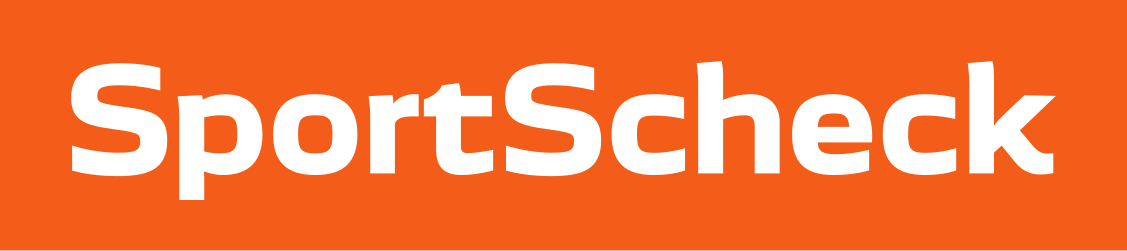
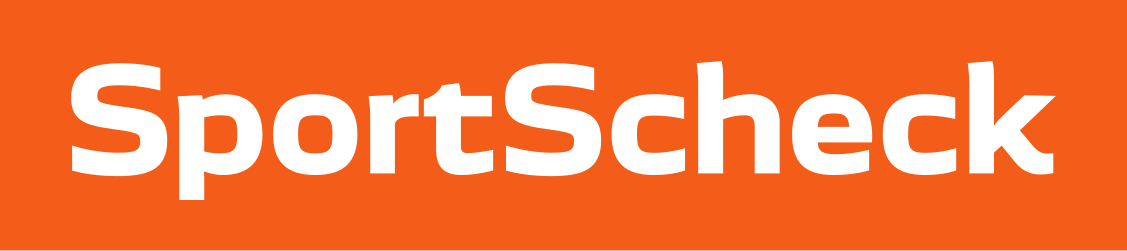
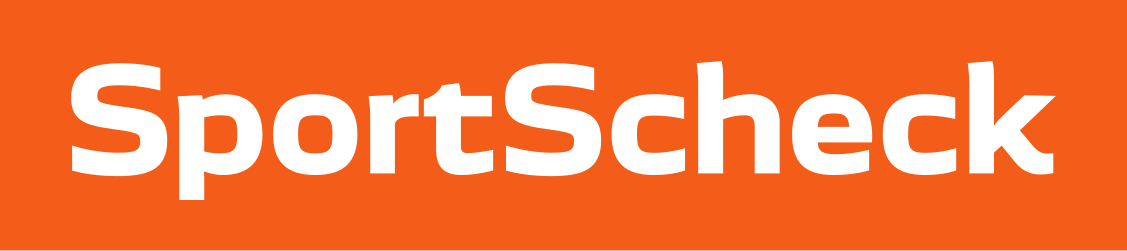
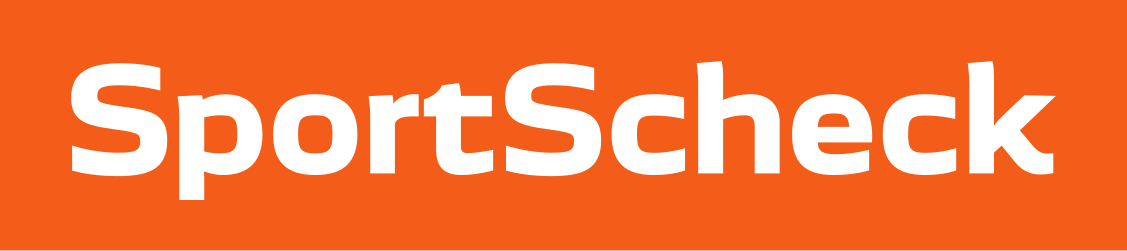
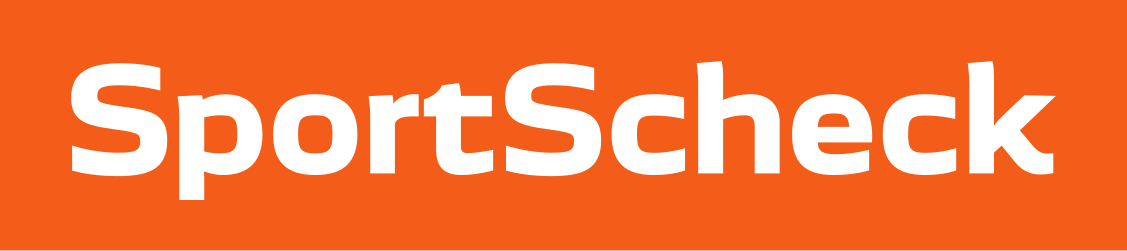
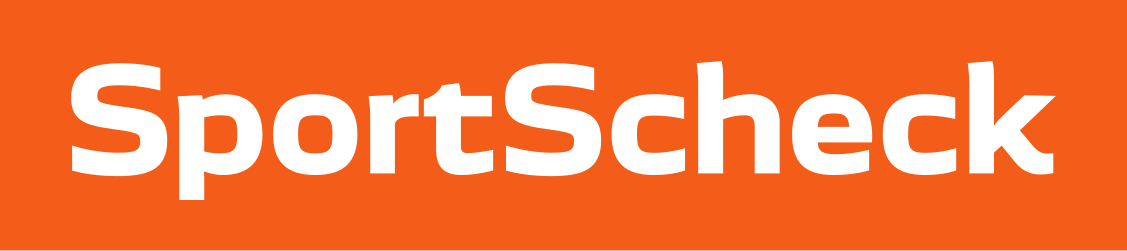

In [89]:
## `m`, folium.Map() ##

import folium
m=folium.Map()

# 3.1. GEOMETRIES (Region, Towns) 
print(f' # 3.1. GEOMETRIES (Region, Towns) ')
if bool(d_geom):  ## CHeck that the dict is NOT empty
    for fg in d_geom['l_fg']:
        fg.add_to(m)
    d_geom['fglc'].add_to(m)


# 3.2. REGIONS/STORES
print('# 3.2. REGIONS/STORES (Markers, Circles)')
if bool(d_region):  ## CHeck that the dict is NOT empty
    for k,v in d_region.items():
        print(f'Region: {k}')
        for s,v in v['store'].items():
            print(f' Store={s}')
            for fg in v['l_children']:
                fg.add_to(m)
            v['fglc'].add_to(m)

# 3.3. GROUPED REGIONS/STORES
# print('# 3.3. GROUPED REGIONS/STORES')
print('# 3.3. GROUPED REGIONS/STORES')
if bool(d_roi):  ## CHeck that the dict is NOT empty
    for fg in d_roi['l_fg']:
        fg.add_to(m)
    d_roi['fglc'].add_to(m)

    
folium.LayerControl(position='topright',collapsed=False).add_to(m)
print('Adding Legend...')
m.fit_bounds(m.get_bounds())
print('Adding fullscreen')

folium.plugins.Fullscreen(position='topleft',
                        title='Expand me',
                        title_cancel='Exit me',
                        force_separate_button=True).add_to(m)

m

In [ ]:
# ### VALIDATION ###
# print(f'Inside ={ num_inside_towns}')
# print(f'Partly ={num_partly_towns}')
# print(f'Outside ={num_outside_towns}')
# print(f'Inside+Partly={num_inside_towns+ num_partly_towns}')
# print(f'Total intersection={gdf_dist.shape[0]}')

# print(f'Inside+Partly+Outside={num_inside_towns+ num_partly_towns+num_outside_towns}')
# print(f'Total Geom ={gdf_census.shape[0]}')

In [ ]:
# m.save('./bw_by_decathlon_sportscheck_intersport.html')
# gdf_merge_concat.to_file('./gdf_sued_germany2.json')

# TO BE REMOVED

In [42]:
# # ################### Distance to point of interest ##########
# gdf_dist = gdf_overlay2.to_crs(4326)
# col_interest = ['ARS','lat','lon',col_perc_geom,'GEN', 'area_geom_int', 'KFL_int', 'EWZ_int']
# gdf_dist = gpd.GeoDataFrame(gdf_dist[col_interest], 
#                             crs='epsg:4326', 
#                                 geometry=[geometry.Point(xy) for xy in zip(gdf_dist['lon'], gdf_dist['lat'])])

# print(f'  Shape(gdf_dist)={gdf_dist.shape[0]}')
# gdf_dist = gdf_dist.drop_duplicates()

# for i,store_coords in enumerate(l_center_points):
#     print(f'[{i+1}/{len(l_center_points)}] store_coords={store_coords}')
#     gdf_dist = f_maps.compute_dist_to_lat_lon(gdf_dist, col_out=f'dist_{store_coords[2]}', 
#                                               lon=store_coords[1], lat=store_coords[0], 
#                                               round_dec=round_dec, units='km')

# l_dist_cols = [col for col in gdf_dist.columns if col.startswith('dist_')]
# gdf_dist['dist'] = gdf_dist[l_dist_cols].min(axis=1)
# gdf_dist['dist_min_store'] = gdf_dist[l_dist_cols].idxmin(axis=1)
# gdf_dist['dist_min_store'] = gdf_dist['dist_min_store'].apply(lambda x: x.replace('dist_',''))



# l_dist_to_remove = gdf_dist.columns[gdf_dist.columns.str.startswith('dist_')].tolist()
# l_dist_to_remove.remove('dist_min_store')
# # l_dist_to_remove
# gdf_dist = gdf_dist.drop(columns=l_dist_to_remove)
# gdf_dist.head()

In [ ]:
# ### fg_inside, fg_partly, fg_outside ###

# ################
# ###  INSIDE  ###
# ################
# gdf_inside = gdf_dist[gdf_dist[col_perc_geom] >= 1.0]
# num_inside_towns = gdf_inside.shape[0]

# fg_inside_circle = f_maps.get_markers_polygon(gdf_inside,
#                                         l_tooltip=['GEN','dist', 'dist_min_store'],
#                                         col_lat='lat', col_lon='lon', 
#                                         name=f'Markers inside {gdf_inside.shape[0]}', color='darkgreen')
# pop_partly = round(gdf_inside.EWZ_int.sum()/10**6,round_dec)
# fg_inside = folium.FeatureGroup(name=f'Markers - Inside [towns:{num_inside_towns}, \
#                                 Pop:{pop_inside}M]')
# fg_inside_circle.add_to(fg_inside)


# ################
# ###  PARTLY  ###
# ################
# gdf_partly = gdf_dist[gdf_dist[col_perc_geom] < 1.0]
# num_partly_towns = gdf_partly.shape[0]

# fg_partly_circle = f_maps.get_markers_polygon(gdf_partly,
#                                         l_tooltip=['GEN','dist', 'dist_min_store'], 
#                                         col_lat='lat', col_lon='lon', 
#                                         name=f'Markers partly {gdf_partly.shape[0]}', color='orange')
# pop_partly = round(gdf_partly.EWZ_int.sum()/10**6,round_dec)
# fg_partly = folium.FeatureGroup(name=f'Markers - Partly [towns:{num_partly_towns}, \
#                                 Pop:{pop_partly}M]')
# fg_partly_circle.add_to(fg_partly)


# # #################
# # ###  OUTSIDE  ###
# # #################
# gdf_outside = gdf_census_region[~gdf_census_region['ARS'].isin(gdf_dist['ARS'])]
# num_outside_towns = gdf_outside.shape[0]

# fg_outside_circle = f_maps.get_markers_polygon(gdf_outside,
#                                         l_tooltip=['GEN'], 
#                                         col_lat='lat', col_lon='lon', 
#                                         name=f'Markers outside {gdf_outside.shape[0]}', 
#                                         color='red')
# pop_outside = round(gdf_outside.EWZ.sum()/10**6,round_dec)
# fg_outside = folium.FeatureGroup(name=f'Markers - Outside [towns:{num_outside_towns}, \
#                                 Pop:{pop_outside}M]')
# fg_outside_circle.add_to(fg_outside)



Inside =64
Partly =83
Outside =956
Inside+Partly=147
Total intersection=147
Inside+Partly+Outside=1103
Total Geom =1103


# TO BE MOVED TO STORES

### TOWN MARKERS

In [ ]:
#### DIST - COMMENTED ####
# l_center_points = list(zip(pdf_stores['lat'], pdf_stores['lon'], pdf_stores['store']+'_'+pdf_stores['name']))#_{pdf_stores['name']}'))
# # l_center_points

# # ################### Distance to point of interest ##########
# gdf_dist = pd.DataFrame(gdf_intersection[['ARS','lat','lon',col_perc_geom,'GEN','EWZ']])
# gdf_dist = gpd.GeoDataFrame(gdf_dist, crs='epsg:4326', 
#                     geometry=[geometry.Point(xy) for xy in zip(gdf_dist['lon'], gdf_dist['lat'])])
# print(f'Shape(gdf_dist)={gdf_dist.shape[0]}')
# gdf_dist = gdf_dist.drop_duplicates()
# print(f'Shape(gdf_dist)={gdf_dist.shape[0]}')
# for i,store_coords in enumerate(l_center_points):
#     print(f'[{i+1}/{len(l_center_points)}] store_coords={store_coords}')
    gdf_dist = f_maps.compute_dist_to_lat_lon(gdf_dist, col_out=f'dist_{store_coords[2]}', 
#                                               lon=store_coords[1], lat=store_coords[0], 
#                                               round_dec=round_dec, units='km')

# l_dist_cols = [col for col in gdf_dist.columns if col.startswith('dist_')]
# gdf_dist['dist'] = gdf_dist[l_dist_cols].min(axis=1)
# gdf_dist['dist_min_store'] = gdf_dist[l_dist_cols].idxmin(axis=1)
# gdf_dist['dist_min_store'] = gdf_dist['dist_min_store'].apply(lambda x: x.replace('dist_',''))



# l_dist_to_remove = gdf_dist.columns[gdf_dist.columns.str.startswith('dist_')].tolist()
# l_dist_to_remove.remove('dist_min_store')
# # l_dist_to_remove
# gdf_dist = gdf_dist.drop(columns=l_dist_to_remove)
# # gdf_dist

In [ ]:
#### MARKERS - COMMENTED ####
# #######################  Gemeinde Markers  ##########################

# ################
# ###  INSIDE  ###
# ################
# gdf_inside = gdf_dist[gdf_dist['dist'] <= radius_km]
# num_inside_towns = gdf_inside.shape[0]

# fg_inside_circle = f_maps.get_markers_polygon(gdf_inside,
#                                         l_tooltip=['GEN','dist', 'dist_min_store'],
#                                         col_lat='lat', col_lon='lon', 
#                                         name=f'Markers inside {gdf_inside.shape[0]}', color='darkgreen')
# pop_inside = round(gdf_inside.EWZ.sum()/10**6,round_dec)
# fg_inside = folium.FeatureGroup(name=f'Markers - Inside [towns:{num_inside_towns}, \
#                                 Pop:{pop_inside}M]')
# fg_inside_circle.add_to(fg_inside)


# ################
# ###  PARTLY  ###
# ################
# gdf_partly = gdf_dist[(gdf_dist['dist'] > radius_km)  & (gdf_dist[col_perc_geom] != 1.0)]
# num_partly_towns = gdf_partly.shape[0]

# fg_partly_circle = f_maps.get_markers_polygon(gdf_partly,
#                                         l_tooltip=['GEN','dist', 'dist_min_store'], 
#                                         col_lat='lat', col_lon='lon', 
#                                         name=f'Markers partly {gdf_partly.shape[0]}', color='orange')
# pop_partly = round(gdf_partly.EWZ.sum()/10**6,round_dec)
# fg_partly = folium.FeatureGroup(name=f'Markers - Partly [towns:{num_partly_towns}, \
#                                 Pop:{pop_partly}M]')
# fg_partly_circle.add_to(fg_partly)


# # #################
# # ###  OUTSIDE  ###
# # #################
# gdf_outside = gdf_census_region[~gdf_census_region['ARS'].isin(gdf_dist['ARS'])]
# num_outside_towns = gdf_outside.shape[0]

# fg_outside_circle = f_maps.get_markers_polygon(gdf_outside,
#                                         l_tooltip=['GEN'], 
#                                         col_lat='lat', col_lon='lon', 
#                                         name=f'Markers outside {gdf_outside.shape[0]}', 
#                                         color='red')
# pop_outside = round(gdf_outside.EWZ.sum()/10**6,round_dec)
# fg_outside = folium.FeatureGroup(name=f'Markers - Outside [towns:{num_outside_towns}, \
#                                 Pop:{pop_outside}M]')
# fg_outside_circle.add_to(fg_outside)

# ### VALIDATION ###
# print(f'Inside ={ num_inside_towns}')
# print(f'Partly ={num_partly_towns}')
# print(f'Outside ={num_outside_towns}')
# print(f'Inside+Partly={num_inside_towns+ num_partly_towns}')
# print(f'Total intersection={gdf_dist.shape[0]}')

# print(f'Inside+Partly+Outside={num_inside_towns+ num_partly_towns+num_outside_towns}')
# print(f'Total Geom ={gdf_geom_4326.shape[0]}')

In [ ]:
# fg_inside.layer_name = fg_inside.layer_name + f'[{num_inside_towns}/{gpd_zensus_filt.shape[0]}]'
# fg_partly.layer_name = fg_partly.layer_name + f'[{num_partly_towns}/{gpd_zensus_filt.shape[0]}]'
# fg_int.layer_name = fg_int.layer_name + f'[Area={sum_int_kfl}, Area_Geom={round(sum_int_geom,round_dec)}, EWZ={sum_int_ewz} ]'


# TO BE REMOVED

## 3.4. NEW CODE -> GEOM+STORES (Intersections,Merges)

### Feature group Intersection (`fg_int_circ_geom` using `gdf_int_circ_geom`)

In [110]:
gdf_int_circ_geom = gpd.overlay(gdf_census.to_crs(epsg=6933), 
                                gdf_store_circles[['geometry','store','store_name']].to_crs(6933), 
                                how='intersection')

NameError: name 'gdf_store_circles' is not defined

In [ ]:
fg_int_circ_geom = folium.FeatureGroup('overlay')
gjson_store = f_maps.get_folium_geojson(gdf_int_circ_geom,#.to_crs(4326), 
                        fields=['GEN','store_name', 'EWZ', 'KFL'],
                        aliases = ['Location','store_name', 'Pop', 'Area_dbms'])
gjson_store.add_to(fg_int_circ_geom)

### Feature group Merge (`fg_mer_circ_geom` using `gdf_mer_circ_geom`)

In [ ]:
gdf_mer_circ_geom = gdf_int_circ_geom.groupby(['store','store_name']).agg( \
        {'geometry': lambda x: x.geometry.union_all(),
        'EWZ':'sum', 
        'KFL' : 'sum',
        }).set_geometry("geometry").set_crs(6933).reset_index()
gdf_mer_circ_geom['area_geom'] = gdf_mer_circ_geom.geometry.area / 10**6
# gdf_me.head()

In [ ]:
fg_mer_circ_geom = folium.FeatureGroup('merge')
gjson_store = f_maps.get_folium_geojson(gdf_mer_circ_geom.to_crs(4326),
                        fields=['store', 'store_name', 'EWZ', 'area_geom', 'KFL'],
                        aliases = ['store','store_name', 'Pop', 'Area_geom[Km2]', 'Area_dbms[Km2]'])
gjson_store.add_to(fg_mer_circ_geom)

## 3.5.OLD CODE

### Feature Group Circles (`fg_circ` using `gdf_store_circles`)
[`pdf_stores` and `radius_km`]

In [ ]:
import math, folium

gdf_store_circles = f_maps.get_gdf_circle(df=pdf_stores, radius_km= radius_km)
# gdf_store_circles.shape

fg_geom_area = gdf_census_merged.area_geom.sum()
num_stores = gdf_store_circles.shape[0]
area_circ  = round(math.pi * radius_km**2, round_dec)
area_total = round(num_stores*area_circ, round_dec)
perc_area  = round(area_total/fg_geom_area, round_dec)

str_legend = f'[# Circles={num_stores}, radius={radius_km}Km, ' \
             f'area circle={area_circ}Km2, ' \
             f'area total ={area_total}Km2, ' \
             f'perc_area = {perc_area}]'
# str_legend
fg_circ_store = folium.FeatureGroup(name=f'Circles {str_legend}')
gjson_store = f_maps.get_folium_geojson(gdf_store_circles, 
                                fields=['store','name', 'address'],
                                # aliases = ['Shop']
                                )
gjson_store.add_to(fg_circ_store)

<!-- ### Featour Group Circles union (`fg_circ_union`) -->

### Feature Group Circles (`fg_circ_merged` using `gdf_store_circles_merged`)
[`pdf_stores` and `radius_km`])

In [ ]:
poly_merged = gdf_store_circles.geometry.union_all()
gdf_store_circles_merged = gpd.GeoSeries([poly_merged]).to_frame(name='geometry').set_crs(epsg=4326)
num_stores = gdf_store_circles.shape[0]
area_total = round(gdf_store_circles_merged.to_crs(6933).geometry.area.sum() / 10**6, round_dec)
perc_area  = round(area_total/fg_geom_area, round_dec)


str_legend = f'[# Stores={num_stores},' \
             f'area ={area_total}Km2, ' \
             f'perc_area = {perc_area}]'

gdf_store_circles_merged['num_stores'] = num_stores
gdf_store_circles_merged['area'] = area_total
gdf_store_circles_merged['perc_area'] = perc_area


fg_circ_merged = folium.FeatureGroup(name=f'Circles Merged {str_legend}')
gjson_store = f_maps.get_folium_geojson(gdf_store_circles_merged, 
                                fields=['num_stores','area', 'perc_area'],
                                aliases = ['# Stores','Area [Km2]', 'Percentage'],
                                is_styled = True
                                )
gjson_store.add_to(fg_circ_merged)

### Feature Group MERGE (`fg_merge` using [`gdf_intersection`, `gdf_overlay`])

In [ ]:
if ('centroid' in gdf_census_region.columns):
    gdf_census_region = gdf_census_region.drop(columns=['centroid'])

col_perc_dbms = 'PERC_dbms_int'
col_perc_geom = 'PERC_geom_int'
col_perc_pop = 'PERC_pop'
l_cols_percentaged = ['area_geom', 'EWZ', 'KFL']

d_columns = {
    'area_geom':{'alias' : 'area',        'is_norm': True,  'is_int':False},
    'KFL':     {'alias' : 'area_data',    'is_norm': True,  'is_int':False},
    'EWZ':     {'alias' : 'Population',   'is_norm': True,  'is_int':True}
}

In [ ]:
############# OVERLAY / individual ####################

# Set the column used for NORMALIZATION (denominator)
gdf_intersection = gpd.overlay(gdf_census_region, gdf_store_circles_merged.to_crs(6933), how='intersection')
gdf_intersection = gdf_intersection.drop_duplicates()
gdf_intersection['area'] = round(gdf_intersection['geometry'].area / 10**6, 2)
gdf_intersection[col_perc_geom] = gdf_intersection['area'] / gdf_intersection['area_geom']

# Generate Overlay with the intersection and drop duplicates
gdf_overlay = f_maps.overlay_shapes(gdf_circle=gdf_intersection,
                                    col_perc=col_perc_geom, 
                                    d_columns=d_columns)
gdf_overlay_dd = gdf_overlay.drop_duplicates(subset=['OBJID'])

# Merge Overlay
gdf_merge = f_maps.merge_shapes(gdf_intersection, l_col_percs=l_cols_percentaged,
                                d_percs={'data':'KFL', 'geom':'area_geom'}, 
                                num_dec=round_dec, is_logging=True)
gdf_merge = gdf_merge.drop_duplicates()


total_area_geom = round(gdf_census_region.geometry.area.sum() / 10**6, round_dec)
total_area_pop = round(gdf_census_region.EWZ.sum() / 10**6, round_dec)
# merge_area_dbms = round(gdf_census_region.KFL.sum(), round_dec)
# merge_area_circ = round(gdf_store_circles_merged.to_crs(6933).geometry.area.sum() / 10**6, round_dec)
merge_area_inside = round(gdf_intersection["area"].sum() , round_dec)
perc_area_inside  = round(merge_area_inside/total_area_geom, round_dec)
pop_inside =  round(gdf_merge.EWZ_int.sum() / 10**6, round_dec)
pop_total =  round(gdf_merge.EWZ.sum() / 10**6, round_dec)
perc_pop = round(pop_inside/total_area_pop, round_dec)


gdf_merge['EWZ'] = gdf_merge.EWZ.sum()
gdf_merge['KFL'] = gdf_merge.KFL.sum()

# area_dbms={merge_area_dbms}Km2,  \
# area_circ_merged={merge_area_circ}Km2, \
msg_merge = f'area_int={merge_area_inside}Km2, \
              total_area_geom={total_area_geom}Km2,  \
              perc_area={perc_area_inside}, \
              Pop_inside={pop_inside}M,  \
              Pop_total={total_area_pop}M, \
              perc_pop={perc_pop} '


fg_merge = folium.FeatureGroup(name=f'Merge (Geom, Circles) [{msg_merge}]')

# gdf_merge['num_in'] = gdf_inside.shape[0]
# gdf_merge['num_part'] = gdf_partly.shape[0]
gjson_store = f_maps.get_folium_geojson(gdf_merge, 
                                  fields=[
                                    # 'KFL_int', 'KFL', 'perc_data', 
                                    'area_geom_int', 'area_geom', 'perc_geom',
                                    'EWZ_int', 'EWZ',
                                    # 'num_in', 'num_part', 
                                    ],
                                  aliases = [
                                    # 'Area_dbms intersection [Km2]', 'Area_dbms shape [Km2]','Percentage dbms', 
                                    'Area_geom intersection [Km2]', 'Area_geom shape [Km2]','Percentage geometry',
                                    'Population intersection', 'Population shape',
                                    # '# Localities inside', 
                                    # '# Localities partially inside',
                                    ])
gjson_store.add_to(fg_merge)

area_geom = 3254.19
area_geom_int = 2221.0
EWZ = 3051459
EWZ_int = 2441322
KFL = 3199
KFL_int = 2181.25
perc_data = 0.68
perc_geom = 0.68


In [ ]:
gdf_intersection

OBJID  ADE  GF  BSG           ARS       AGS       SDV_ARS  \
0    DEBKGVG20000040K    6   4    1  081110000000  08111000  081110000000   
1    DEBKGVG20000040L    6   4    1  081150003003  08115003  081150003003   
2    DEBKGVG20000040M    6   4    1  081150028028  08115028  081150028028   
3    DEBKGVG20000040N    6   4    1  081150029029  08115029  081150029029   
4    DEBKGVG20000040O    6   4    1  081150041041  08115041  081150041041   
..                ...  ...  ..  ...           ...       ...           ...   
533  DEBKGVG2000004S9    6   4    1  084265005028  08426028  084265005028   
534  DEBKGVG2000004SA    6   4    1  084265005070  08426070  084265005070   
535  DEBKGVG2000004SP    6   4    1  084265009108  08426108  084265009108   
536  DEBKGVG2000004TC    6   4    1  084355007053  08435053  084355007053   
537  DEBKGVG2000004TD    6   4    1  084355007059  08435059  084355007059   

            GEN       BEZ  IBZ                     BEM NBD SN_L SN_R SN_K  \
0     Stuttgart     Stadt   60               kreisfrei  ja   08    1   11   
1     Böblingen     Stadt   61                      --  ja   08    1   15   
2      Leonberg     Stadt   61                      --  ja   08    1   15   
3      Magstadt  Gemeinde   62                      --  ja   08    1   15   
4     Renningen     Stadt   61                      --  ja   08    1   15   
..          ...       ...  ...                     ...  ..  ...  ...  ...   
533  Burgrieden  Gemeinde   64  gemeinschaftsangehörig  ja   08    4   26   
534    Laupheim     Stadt   63  gemeinschaftsangehörig  ja   08    4   26   
535    Schwendi  Gemeinde   64  gemeinschaftsangehörig  ja   08    4   26   
536  Sipplingen  Gemeinde   64  gemeinschaftsangehörig  ja   08    4   35   
537  Überlingen     Stadt   63  gemeinschaftsangehörig  ja   08    4   35   

    SN_V1 SN_V2 SN_G FK_S3   NUTS         ARS_0     AGS_0     EWZ  KFL  \
0      00    00  000     R  DE111  081110000000  08111000  632865  207   
1      00    03  003     R  DE112  081150003003  08115003   51460   39   
2      00    28  028     R  DE112  081150028028  08115028   49512   48   
3      00    29  029     R  DE112  081150029029  08115029    9789   19   
4      00    41  041     R  DE112  081150041041  08115041   18596   31   
..    ...   ...  ...   ...    ...           ...       ...     ...  ...   
533    50    05  028     R  DE146  084265005028  08426028    4255   21   
534    50    05  070     R  DE146  084265005070  08426070   22863   61   
535    50    09  108     R  DE146  084265009108  08426108    7061   49   
536    50    07  053     R  DE147  084355007053  08435053    2189    4   
537    50    07  059     R  DE147  084355007059  08435059   23098   58   

               DLM_ID          EPK  EPK_norm  KFL_GPD  area_geom        lat  \
0    DEBKGDL20000DZKQ  3057.318841       0.0   209.95     209.95  48.774528   
1    DEBKGDL20000DZZJ  1319.487179       0.0    38.85      38.85  48.681829   
2    DEBKGDL20000E4K3  1031.500000       0.0    48.93      48.93  48.790222   
3    DEBKGDL20000E25V   515.210526       0.0    19.18      19.18  48.744854   
4    DEBKGDL20000E25W   599.870968       0.0    30.93      30.93  48.772198   
..                ...          ...       ...      ...        ...        ...   
533  DEBKGDL20000DWQK   202.619048       0.0    21.85      21.85  48.231287   
534  DEBKGDL20000DWYR   374.803279       0.0    61.84      61.84  48.227640   
535  DEBKGDL20000E1X1   144.102041       0.0    49.14      49.14  48.190639   
536  DEBKGDL20000E59B   547.250000       0.0     4.44       4.44  47.798317   
537  DEBKGDL20000E4ZZ   398.241379       0.0    58.84      58.84  47.796793   

          lon  num_stores    area  perc_area  \
0    9.172003          14  209.95       0.39   
1    9.019745          14   38.85       0.39   
2    9.007016          14   48.93       0.39   
3    8.979303          14   19.18       0.39   
4    8.924277          14   30.93       0.39   
..        ...         ...     ...       

### Feature Group INDIV (`fg_join_ind` and `fg_merge_ind`)

In [ ]:
fg_join_ind = folium.FeatureGroup(name=f'Individual Join [#Stores={len(l_center_points)}]')
fg_merge_ind = folium.FeatureGroup(name=f'Individual Merge [#Stores={len(l_center_points)}]')
# gdf_sc_6933 = gdf_store_circles.to_crs(6933)

# for i,(index,store) in enumerate(gdf_sc_6933.iterrows()):
#     print(f'[{i}/{gdf_store_circles.shape[0]}] Store={store.store}_{store['name']}')

for i,center_point in enumerate(l_center_points):
    print(f'[{i+1}/{len(l_center_points)}] center_point={center_point}')
    lon = center_point[1]
    lat = center_point[0]
    store_name = center_point[2]

    # Convert the Shapely circle to a geoDataFrame
    poly_circle = f_maps.circle_latlon(lon=lon, lat=lat, radius=1000 * radius_km)
    gdf = gpd.GeoSeries([poly_circle])
    gdf_overlay = gdf.to_frame(name='geometry').set_crs(epsg=4326)
    gdf_circle_6933 = gdf_overlay.to_crs(epsg=6933)
    gdf_overlay = gpd.overlay(gdf_census_region, gdf_circle_6933, how='intersection')

    # Set the column used for NORMALIZATION (numerator)
    gdf_overlay['area'] = round(gdf_overlay['geometry'].area / 10**6, 3)
    gdf_overlay[col_perc_geom] = round(gdf_overlay['area'] / gdf_overlay['area_geom'], 3)
    
    gdf_overlay = f_maps.overlay_shapes(gdf_circle=gdf_overlay,
                                        col_perc=col_perc_geom, 
                                        d_columns=d_columns)
    gdf_overlay = gdf_overlay.drop_duplicates(subset=['OBJID'])
    gdf_overlay[col_perc_dbms] = round(gdf_overlay['KFL_int'] / gdf_overlay['KFL'], 3)
    gdf_overlay[col_perc_pop] = round(gdf_overlay['EWZ_int'] / gdf_overlay['EWZ'], 3)
    gdf_overlay['store_name'] = store_name

    gjson_store = f_maps.get_folium_geojson(gdf_overlay,#.to_crs(4326), 
                                    fields=[
                                        'store_name', 'GEN',
                                        # 'KFL_int', 'KFL', # col_perc_dbms, 
                                        'area_geom_int', 'area_geom', col_perc_geom,
                                        'EWZ_int', 'EWZ', col_perc_pop,
                                        # 'num_in', 'num_part', 
                                        ],
                                    aliases = [
                                        'Store', 'City',
                                        # 'Area_dbms intersection [Km2]', 'Area_dbms shape [Km2]','Percentage dbms', 
                                        'Area_geom intersection [Km2]', 'Area_geom shape [Km2]', 'Percentage geometry',
                                        'Population inside', 'Population total', 'Percentage population'
                                        # 'Localities inside', 'Localities partially inside',
                                        ])
    gjson_store.add_to(fg_join_ind)

    gdf_merge = f_maps.merge_shapes(gdf_overlay, l_col_percs=l_cols_percentaged,
                                            d_percs={'data':'KFL', 'geom':'area_geom'}, 
                                            num_dec=round_dec, is_logging=False)
    # Copying Location Identifier
    gdf_merge['GEN'] = gdf_overlay['GEN']
    # Set the column used for NORMALIZATION (numerator)
    gdf_merge['area'] = round(gdf_merge['geometry'].area / 10**6, round_dec)
    gdf_merge[col_perc_geom] = round(gdf_merge['area'] / gdf_merge['area_geom'], 3)
    gdf_merge[col_perc_dbms] = round(gdf_merge['KFL_int'] / gdf_merge['KFL'], 3)
    gdf_merge[col_perc_pop] = round(gdf_merge['EWZ_int'] / gdf_merge['EWZ'], 3)
    gdf_merge['store_name'] = store_name
    
    gjson_store = f_maps.get_folium_geojson(gdf_merge,#.to_crs(4326), 
                            fields=[
                                'store_name',
                                # 'KFL_int', 'KFL', col_perc_dbms,
                                'area_geom_int', 'area_geom', col_perc_geom,
                                'EWZ_int', 'EWZ', col_perc_pop,
                                # 'num_in', 'num_part', 
                                ],
                            aliases = [
                                'Location',
                                # 'Area_dbms intersection [Km2]', 'Area_dbms shape [Km2]', 'Percentage dbms', 
                                'Area_geom intersection [Km2]', 'Area_geom shape [Km2]', 'Percentage area',
                                'Population intersection', 'Population shape', 'Percentage population'
                                # 'Localities inside', 'Localities partially inside',
                                ])
    gjson_store.add_to(fg_merge_ind)

    if i==0:
        gdf_merge_concat = gdf_merge
    else:
        gdf_merge_concat = pd.concat([gdf_merge_concat, gdf_merge], axis=0)

[1/14] center_point=(49.00488565, 8.449674128073184, 'decathlon_Karlsruhe-Durlach')
[2/14] center_point=(48.4007813, 9.9583729, 'decathlon_Ulm')
[3/14] center_point=(48.7026898, 9.437392619846309, 'decathlon_Plochingen')
[4/14] center_point=(48.7965766, 8.19518157114592, 'decathlon_Baden - Baden')
[5/14] center_point=(48.8201891, 10.045626348192611, 'decathlon_Aalen-Essingen')
[6/14] center_point=(49.3941626, 8.57783239839136, 'decathlon_Schwetzingen')
[7/14] center_point=(48.6882907, 9.0090554, 'decathlon_Böblingen')
[8/14] center_point=(47.610891699999996, 7.661843945356753, 'decathlon_Lörrach')
[9/14] center_point=(48.900043, 9.1916945, 'decathlon_Ludwigsburg')
[10/14] center_point=(49.1460258, 9.2214379, 'decathlon_Heilbronn-K3')
[11/14] center_point=(48.472267200000005, 7.944426365060242, 'decathlon_Offenburg')
[12/14] center_point=(47.7599556, 8.8420214, 'decathlon_Singen')
[13/14] center_point=(48.791258850000006, 9.182104646022687, 'decathlon_Stuttgart-Milaneo')
[14/14] center_

### `fg_join` EXTERNAL

In [ ]:
# gdf_geom_4326.head(1)

############# JOIN ####################
gdf_join = gpd.sjoin(gdf_geom_4326, gdf_store_circles.to_crs(4326), how="inner", predicate="intersects")
gdf_join['KFL_GPD'] = round(gdf_census_region.to_crs(6933).geometry.area / 10**6, round_dec)
print(f'shape(gdf_join) = {gdf_join.shape[0]}')

gdf_int_dd = gdf_join.drop_duplicates(subset=['OBJID'])
gdf_int_dd['KFL_GPD'] = round(gdf_int_dd.to_crs(6933).geometry.area / 10**6, round_dec)
print(f'shape(gdf_int_dd) ={gdf_int_dd.shape[0]}')
### RELEVANT NUMBERS ###
int_gem = gdf_int_dd.shape[0]
int_ewz =gdf_join.EWZ.sum()
int_area_geom_nomerge = gdf_join.KFL_GPD.sum()
int_area_dbms_nomerge = gdf_join.KFL.sum()
int_area_geom_merge   = gdf_int_dd.KFL_GPD.sum()
int_area_dbms_merge   = gdf_int_dd.KFL.sum()

### MESSAGE ###
int_info_msg = f'# Towns={int_gem}, ' \
                f'# Area (geom, no merge)={int_area_geom_nomerge}Km2, ' \
                f'# Area (dbms, no merge)={int_area_dbms_nomerge}Km2, ' \
                f'Area (geom, merge)={int_area_geom_merge}Km2,' \
                f'Area (dbms, merge)={int_area_dbms_merge}Km2' \
                f'Pop={int_ewz}'

### FEATURE GROUP ###
fg_join = folium.FeatureGroup(name=f'Join/COMBINED [{int_info_msg}')
gjson_store = f_maps.get_folium_geojson(gdf_join, 
                                  fields=['GEN', 'EWZ', 'KFL', 'KFL_GPD'],
                                  aliases = ['Name', 'Population', 'Area_dbms', 'Area_Geom'])
gjson_store.add_to(fg_join)

shape(gdf_join) = 772
shape(gdf_int_dd) =538


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## 3.6. GADMs

### Feature Group Countries (`fg_circ_merged_country`)

In [ ]:
gdf_world = f_maps.load_gdf_from_csv(path=paths.path_wca)
print(gdf_world.shape)
print(gdf_world.head(1))

(255, 6)
                                            geometry  ADMIN ISO_A3  \
0  POLYGON ((-69.99694 12.57758, -69.93639 12.531...  Aruba    ABW   

   Area_total_km2  Area_land_km2  world_land_perc  
0           180.0          180.0              0.0  


In [ ]:
gdf_int_world = gpd.overlay(gdf_world.to_crs(6933), gdf_store_circles_merged.to_crs(6933), how='intersection')
gdf_int_world = gdf_int_world.drop_duplicates()
gdf_int_world['area_intersection'] = round(gdf_int_world.geometry.area / 10**6, round_dec)
# print(gdf_int_world.shape)
# print(gdf_int_world.head(1))

#### `gdf_world`

##### `fg_country_all` (gdf_world)

In [ ]:
# Filtering relevant countries
gdf_world_contain = gdf_world[gdf_world['ISO_A3'].isin(gdf_int_world['ISO_A3'])]

# gdf_world_contain
fg_country_all = folium.FeatureGroup(name=f'Countries Intersecting [{gdf_world_contain.shape[0]}]')
gjson_store = f_maps.get_folium_geojson(gdf_world_contain.to_crs(4326), 
                                  fields=['ADMIN', 'Area_total_km2'], 
                                  aliases=['name', 'Area [km2]'])
gjson_store.add_to(fg_country_all)

##### `fg_country_int` (gdf_world)

In [ ]:
fg_country_int = folium.FeatureGroup(name=f'ALL Country Join [{gdf_int_world.shape[0]}]')
gjson_store = f_maps.get_folium_geojson(gdf_int_world.to_crs(4326), 
                                  fields=['ADMIN','area_intersection'], 
                                  aliases=['name', 'Area [km2]'])
gjson_store.add_to(fg_country_int)

# fg_join_country = folium.FeatureGroup(name=f'Country Join [{gdf_int_world.shape[0]}]')
# for i,(index,country) in enumerate(gdf_int_world.iterrows()):
#     print(f'[{i}/{gdf_int_world.shape[0]}] Country={country.ADMIN}')
#     gpd_country = gpd.GeoDataFrame([country.to_dict()]).set_crs(6399).to_crs(4326)
#     gjson = f_maps.get_folium_geojson(gpd_country, fields=['ADMIN'], aliases=['name'])
#     gjson.add_to(fg_join_country)

#### GADM

In [ ]:
path = 'assets/Geo/GADM/gadm41_'
country_3 = 'AUT'  # 3-letter country code
l_adm = [
    # 'ADM_ADM_0',    # COUNTRY
    'ADM_ADM_1',    # STATE
    # 'ADM_ADM_2',    # REGION
    # 'ADM_ADM_3',    # COUNTY
    # 'ADM_ADM_4',    # MUNICIPALITY
    # 'ADM_ADM_5',  # SUB-MUNICIPALITY (Only France, Rwanda), aka PARISH
    ]
ext  = 'gpkg'
path_adm = f'{path}{country_3}.{ext}'
print(f'path_adm={path_adm}')  # PATH where the file is stored
logging = True

path_adm=assets/Geo/GADM/gadm41_AUT.gpkg


In [ ]:
gdf_world = f_maps.load_gdf_from_csv(path=paths.path_wca)
gdf_int_world = gpd.overlay(gdf_world.to_crs(6933), gdf_store_circles_merged.to_crs(6933), how='intersection')
gdf_int_world = gdf_int_world.drop_duplicates()


l_country_iso = list(gdf_int_world.ISO_A3.values)

##### `fg_country_all` (GADM=0)

In [ ]:
l_adm = [
    'ADM_ADM_0',    # COUNTRY
    ]

In [ ]:
for i,iso3 in enumerate(l_country_iso):
    print(f'[{i+1}/{len(l_country_iso)}] Country={iso3}')
    path_adm = f'{path}{iso3}.{ext}'
    [l_gdf, l_name_adm, l_tooltip_adm ] = f_maps.extract_gdf_gpkg(
        path       = path_adm, 
        l_levels   = l_adm,
        is_logging = False
    )
    if i==0:
        gdf_adm0 = l_gdf[0]
    else:
        gdf_adm0= pd.concat([gdf_adm0, l_gdf[0]])

[1/3] Country=CHE
path=assets/Geo/GADM/gadm41_CHE.gpkg
ADM=0
[2/3] Country=DEU
path=assets/Geo/GADM/gadm41_DEU.gpkg
ADM=0
[3/3] Country=FRA
path=assets/Geo/GADM/gadm41_FRA.gpkg
ADM=0


In [ ]:
gdf_int_countries = gpd.overlay(gdf_adm0.to_crs(6933), gdf_store_circles_merged.to_crs(6933), how='intersection')
gdf_int_countries = gdf_int_countries.drop_duplicates()
gdf_int_countries['area_intersection'] = round(gdf_int_countries.geometry.area / 10**6, round_dec)
print(gdf_int_countries.shape)
print(gdf_int_countries.head(1))

(3, 7)
  GID_0      COUNTRY  num_stores      area  perc_area  \
0   CHE  Switzerland          14  14119.32       0.39   

                                            geometry  area_intersection  
0  MULTIPOLYGON (((722255.399 5400604.903, 722938...             783.41  


In [ ]:
# Filtering relevant countries
col_filter = 'COUNTRY'
col_alias = 'Country'
gdf_adm0_map = gdf_adm0[gdf_adm0[col_filter].isin(gdf_int_countries[col_filter])]
print(gdf_adm0_map.shape)
gdf_adm0_map = gdf_adm0_map.drop_duplicates()
print(gdf_adm0_map.shape)

(3, 3)
(3, 3)


In [ ]:
fg_gadm0_all = folium.FeatureGroup(name=f'Countries [{gdf_adm0_map.shape[0]}]')
gjson_store = f_maps.get_folium_geojson(gdf_adm0_map,
                                  fields=['COUNTRY', col_filter], 
                                  aliases=['Country', col_alias])
gjson_store.add_to(fg_gadm0_all)    

##### `fg_country_int` (GADM=0)

In [ ]:
gdf_gadm0_int = gpd.overlay(gdf_adm0_map.to_crs(6933), gdf_store_circles_merged.to_crs(6933), how='intersection')
gdf_gadm0_int = gdf_gadm0_int.drop_duplicates()
gdf_gadm0_int['area_intersection'] = round(gdf_gadm0_int.geometry.area / 10**6, round_dec)
# print(gdf_gadm0_int.shape)
# print(gdf_gadm0_int.head(1))

In [ ]:
fg_gadm0_ind = folium.FeatureGroup(name=f'ALL Countries Join [{gdf_gadm0_int.shape[0]}]')
gjson_store = f_maps.get_folium_geojson(gdf_gadm0_int.to_crs(4326), 
                                  fields=['COUNTRY', 'area_intersection'], 
                                  aliases=['Country', 'Area[km2]'])
gjson_store.add_to(fg_gadm0_ind)

##### `fg_states_all` (GADM=1)

In [ ]:
l_adm = [
    'ADM_ADM_1',    # STATE
    ]

In [ ]:


for i,iso3 in enumerate(l_country_iso):
    print(f'[{i+1}/{len(l_country_iso)}] Country={iso3}')
    path_adm = f'{path}{iso3}.{ext}'
    [l_gdf, l_name_adm, l_tooltip_adm ] = f_maps.extract_gdf_gpkg(
        path       = path_adm, 
        l_levels   = l_adm,
        is_logging = False
    )
    if i==0:
        gdf_adm1 = l_gdf[0]
    else:
        gdf_adm1 = pd.concat([gdf_adm1, l_gdf[0]])

# print(gdf_adm1.shape)
# print(gdf_adm1.head(1))

[1/3] Country=CHE
path=assets/Geo/GADM/gadm41_CHE.gpkg
ADM=1
yes
l_columns=['COUNTRY', 'GID_0', 'NAME_1', 'TYPE_1']
[2/3] Country=DEU
path=assets/Geo/GADM/gadm41_DEU.gpkg
ADM=1
yes
l_columns=['COUNTRY', 'GID_0', 'NAME_1', 'TYPE_1']
[3/3] Country=FRA
path=assets/Geo/GADM/gadm41_FRA.gpkg
ADM=1
yes
l_columns=['COUNTRY', 'GID_0', 'NAME_1', 'TYPE_1']


In [ ]:
gdf_int_states = gpd.overlay(gdf_adm1.to_crs(6933), gdf_store_circles_merged.to_crs(6933), how='intersection')
gdf_int_states = gdf_int_states.drop_duplicates()
gdf_int_states['area_intersection'] = round(gdf_int_states.geometry.area / 10**6, round_dec)
# print(gdf_int_states.shape)
# print(gdf_int_states.head(1))

In [ ]:
# Filtering relevant countries
col_filter = 'NAME_1'
col_alias = 'State'
gdf_adm1_map = gdf_adm1[gdf_adm1[col_filter].isin(gdf_int_states[col_filter])]
print(gdf_adm1_map.shape)
gdf_adm1_map = gdf_adm1_map.drop_duplicates()
print(gdf_adm1_map.shape)

(12, 12)
(12, 12)


In [ ]:
fg_states_all = folium.FeatureGroup(name=f'States [{gdf_adm1_map.shape[0]}]')
gjson_store = f_maps.get_folium_geojson(gdf_adm1_map,
                                  fields=['COUNTRY', col_filter], 
                                  aliases=['Country', col_alias])
gjson_store.add_to(fg_states_all)

##### `fg_states_int` (GADM=1)

In [ ]:
fg_states_int = folium.FeatureGroup(name=f'ALL States Join [{gdf_int_states.shape[0]}]')
gjson_store = f_maps.get_folium_geojson(gdf_int_states.to_crs(4326), 
                                  fields=['COUNTRY', 'NAME_1', 'area_intersection'], 
                                  aliases=['Country', 'State', 'Area[km2]'])
gjson_store.add_to(fg_states_int)

### Feature Group JOIN (`fg_join` using [`gdf_geom_4326` and `gdf_overlay`]

In [ ]:
# gdf_geom_4326.head(1)

############# JOIN ####################
gdf_join = gpd.sjoin(gdf_geom_4326, gdf_store_circles.to_crs(4326), how="inner", predicate="intersects")
gdf_join['KFL_GPD'] = round(gdf_census_region.to_crs(6933).geometry.area / 10**6, round_dec)
print(f'shape(gdf_join) = {gdf_join.shape[0]}')

gdf_int_dd = gdf_join.drop_duplicates(subset=['OBJID'])
gdf_int_dd['KFL_GPD'] = round(gdf_int_dd.to_crs(6933).geometry.area / 10**6, round_dec)
print(f'shape(gdf_int_dd) ={gdf_int_dd.shape[0]}')
### RELEVANT NUMBERS ###
int_gem = gdf_int_dd.shape[0]
int_ewz =gdf_join.EWZ.sum()
int_area_geom_nomerge = gdf_join.KFL_GPD.sum()
int_area_dbms_nomerge = gdf_join.KFL.sum()
int_area_geom_merge   = gdf_int_dd.KFL_GPD.sum()
int_area_dbms_merge   = gdf_int_dd.KFL.sum()

### MESSAGE ###
int_info_msg = f'# Towns={int_gem}, ' \
                f'# Area (geom, no merge)={int_area_geom_nomerge}Km2, ' \
                f'# Area (dbms, no merge)={int_area_dbms_nomerge}Km2, ' \
                f'Area (geom, merge)={int_area_geom_merge}Km2,' \
                f'Area (dbms, merge)={int_area_dbms_merge}Km2' \
                f'Pop={int_ewz}'

### FEATURE GROUP ###
fg_join = folium.FeatureGroup(name=f'Join/COMBINED [{int_info_msg}')
gjson_store = f_maps.get_folium_geojson(gdf_join, 
                                  fields=['GEN', 'EWZ', 'KFL', 'KFL_GPD'],
                                  aliases = ['Name', 'Population', 'Area_dbms', 'Area_Geom'])
gjson_store.add_to(fg_join)

shape(gdf_join) = 772
shape(gdf_int_dd) =538


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## 3.7. TOWN Markers